<a href="https://colab.research.google.com/github/khawla15/data-science-project-/blob/main/machine%20learning%20(polynomial%2C%20SVR%2C%20Simple%20linear%20regression%20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scenario**

---

You are working in a specific company as a data analyst. This company has an
available position for country manager and new person applied for this position.
He/She has been working for 3 years as a country manager in another company and
his/her salary is 133,000$. HR sent you the positions’ salary dataset and ask you if
he/she deserve the 133,000$? Consider his\her level on 5.5.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:

#importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
#importing dataset 
df =pd.read_csv('/content/Position_Salaries(1).csv')
X = df.iloc[:,1:-1].values.astype(float)
y = df.iloc[:,-1].values.astype(float)

In [5]:
#--simple linear regression--
LinearReg = LinearRegression()
LinearReg.fit(X,y)
Y_predict = LinearReg.predict(X)

In [6]:
Y_predict

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [7]:

#---polynomial linear regression model---
Poly = PolynomialFeatures(degree = 4)
X_poly = Poly.fit_transform(X)
Linear2 = LinearRegression()
Linear2.fit(X_poly,  y)
#predict new salary with polynomial regression 
poly_pred = Linear2.predict(Poly.fit_transform([[6.5]]))

In [8]:

#show result of predicting
poly_pred

array([158862.45265155])

In [13]:
#----Training SVR model----
#feature scaling :
ss_x = StandardScaler()
ss_y = StandardScaler()

X_svr=ss_x.fit_transform(X.reshape(-1,1))
Y_svr=ss_y.fit_transform(y.reshape(-1,1))

regressor=SVR(kernel='rbf')
regressor.fit(X_svr.reshape(-1,1),Y_svr.reshape(-1,1))

#predict new salary with SVR
svr_pred = regressor.predict(ss_x.transform([[5.5]]))
svr_pred = ss_y.inverse_transform(svr_pred.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:

#predicting value of SVR
svr_pred

array([[131106.77303274]])

Now I will show u the plots of all 3 models :

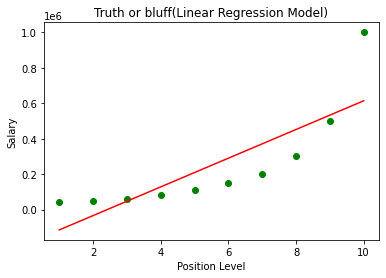

In [16]:

#---visualize linear reg---
plt.scatter(X,y,color = 'green' ) 
plt.plot(X, Y_predict , color='red')
plt.title('Truth or bluff(Linear Regression Model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

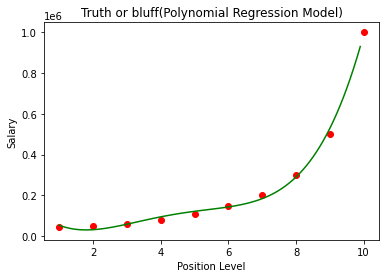

In [17]:
#--visualize Polynomial--
X_grid = np.arange(min(X), max(X) , 0.1)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X,y,color = 'red')
plt.plot(X_grid, Linear2.predict(
Poly.fit_transform(X_grid)), color='green')

plt.title('Truth or bluff(Polynomial Regression Model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

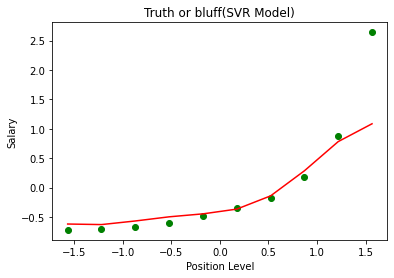

In [18]:
#-- visualize SVR --
plt.scatter(X_svr,Y_svr,color = 'green' ) 
plt.plot(X_svr, regressor.predict(X_svr) , color='red')
plt.title('Truth or bluff(SVR Model)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# **Based on the scenario, My opinion about every model’s result:**

** In simple linear regression model :**

the relationship is positive and the line is leaner but the data is curved

**In Polynomial linear regression:**
it’s better than Simple linear regression, It's more fit and provide best relationship
between dependent and independent variable.

**in Support vector regression :**
the line is fit the data but ihave outliers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')